In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# data cleaning

In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [5]:
df.sample(5)

,v1,v2
129,ham,K..k:)how much does it cost?
5044,ham,We have sent JD for Customer Service cum Accou...
5054,ham,Am on a train back from northampton so i'm afr...
3080,ham,Have a great trip to India. And bring the ligh...
51,ham,"A gram usually runs like &lt;#&gt; , a half e..."


In [6]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2703,ham,Yup no more already... Thanx 4 printing n hand...
5126,ham,"To the wonderful Okors, have a great month. We..."
1902,ham,My sister got placed in birla soft da:-)
1040,ham,Today am going to college so am not able to at...
4589,ham,Tomorrow i am not going to theatre. . . So i c...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['target']=encoder.fit_transform(df['target'])

In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(403)

In [11]:
df=df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

np.int64(0)

# EDA

In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x228936d38c0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

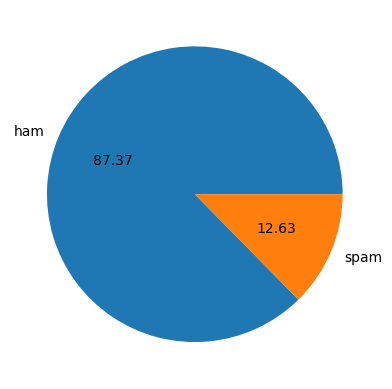

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

# data is imbalanced

In [15]:
import nltk

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
df['nm_char']=df['text'].apply(len)
df.head

<bound method NDFrame.head of       target                                               text  nm_char
0          0  Go until jurong point, crazy.. Available only ...      111
1          0                      Ok lar... Joking wif u oni...       29
2          1  Free entry in 2 a wkly comp to win FA Cup fina...      155
3          0  U dun say so early hor... U c already then say...       49
4          0  Nah I don't think he goes to usf, he lives aro...       61
...      ...                                                ...      ...
5567       1  This is the 2nd time we have tried 2 contact u...      161
5568       0              Will Ì_ b going to esplanade fr home?       37
5569       0  Pity, * was in mood for that. So...any other s...       57
5570       0  The guy did some bitching but I acted like i'd...      125
5571       0                         Rofl. Its true to its name       26

[5169 rows x 3 columns]>

In [19]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df.head()

,target,text,nm_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()


,target,text,nm_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df.describe()

,target,nm_char,num_words,num_sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
df[df['target']==0][['nm_char','num_words','num_sen']].describe()

,nm_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target']==1][['nm_char','num_words','num_sen']].describe()

,nm_char,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns


<Axes: xlabel='nm_char', ylabel='Count'>

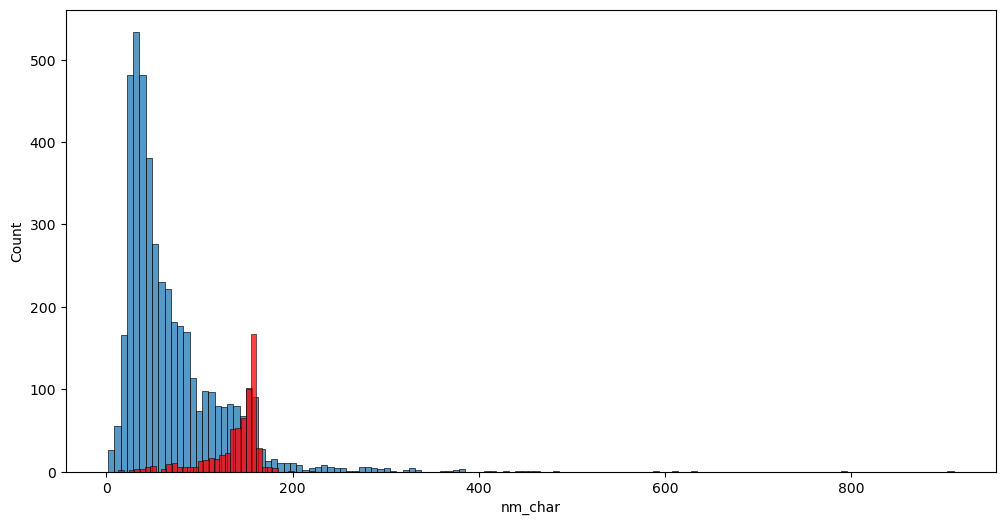

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['nm_char'])
sns.histplot(df[df['target']==1]['nm_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

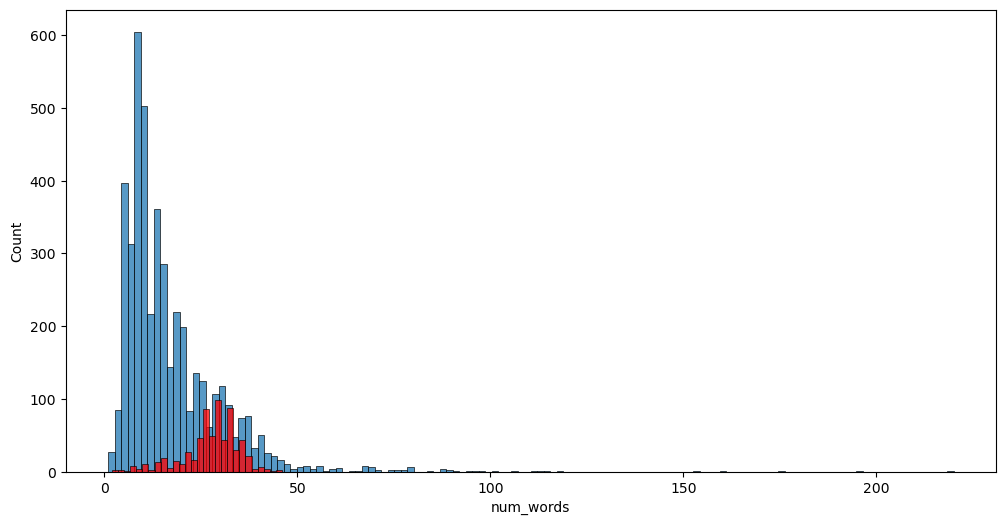

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

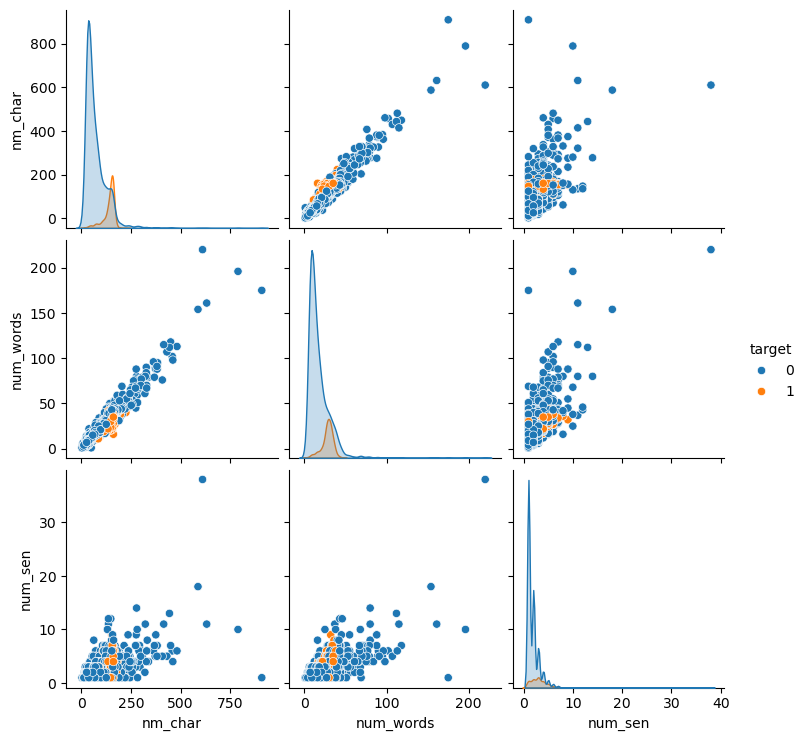

In [28]:
sns.pairplot(df,hue='target')

<Axes: >

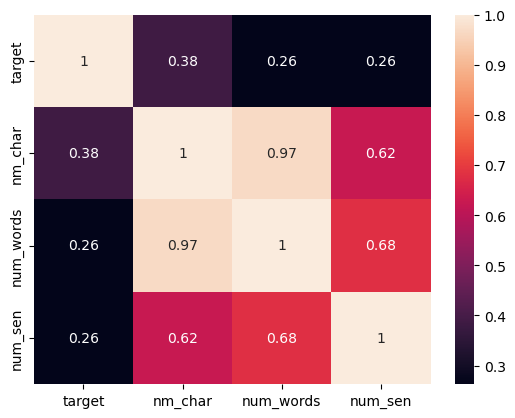

In [29]:
sns.heatmap(
    df[['target','nm_char','num_words','num_sen']].corr(),
    annot=True
)


# here we keep num char column bcz it has strongly corelation with other columns and so on specially with target column

In [30]:
import nltk
import string

from nltk.corpus import stopwords
string.punctuation
from nltk.stem.porter import PorterStemmer

stopwords.words('english')
ps = PorterStemmer()


In [31]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    
    

In [32]:
transform_text("I'm gonn be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gonn home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['transformed_text']=df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,nm_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [36]:
plt.figure(figsize=(15,6))
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

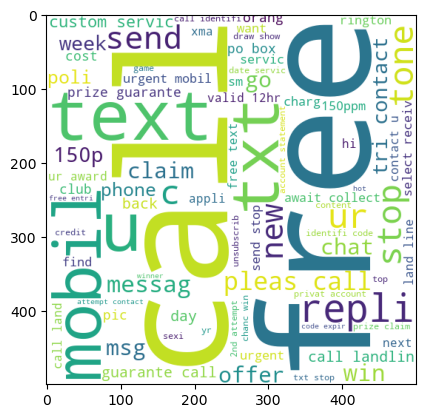

In [37]:
plt.imshow(spam_wc)

In [38]:
plt.figure(figsize=(15,6))
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

<Figure size 1500x600 with 0 Axes>

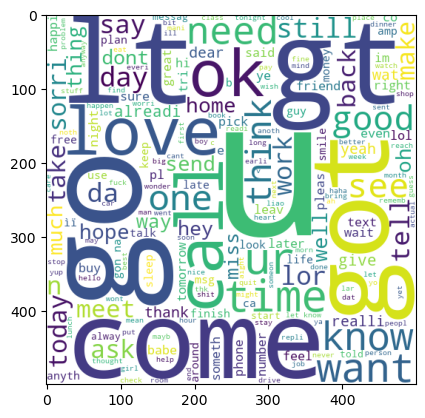

In [39]:
plt.imshow(spam_wc)

In [40]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [41]:
len(spam_corpus)

9939

In [42]:
from collections import Counter
spam_df=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count'])

<Axes: xlabel='count', ylabel='word'>

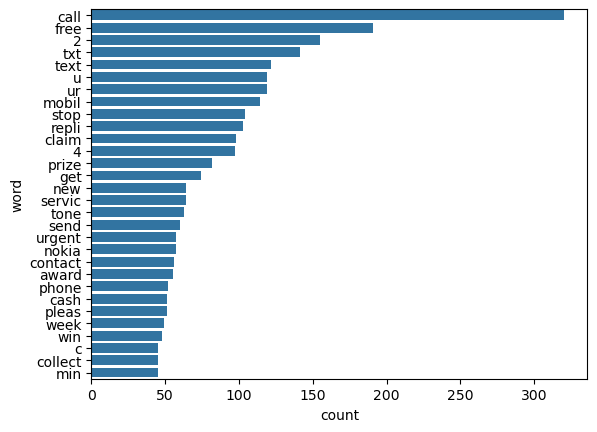

In [43]:
sns.barplot(x='count',y='word',data=spam_df)

In [44]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [45]:
from collections import Counter
ham_df=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count'])

<Axes: xlabel='count', ylabel='word'>

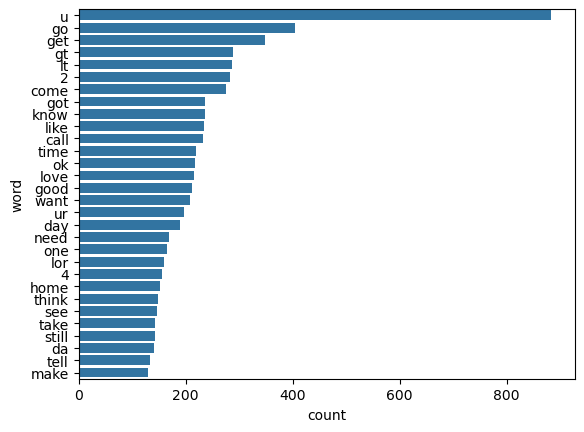

In [46]:
sns.barplot(x='count',y='word',data=ham_df)

# model building

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [48]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5169, 6708)

In [50]:
y=df['target'].values

In [51]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score



In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [56]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


In [57]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# tfidf with mnb 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [59]:
svc = LinearSVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    return accuracy,precision

In [62]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9666666666666667)

In [63]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    cur_acc,cur_pre=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",cur_acc)
    print("Precision - ",cur_pre)
    
    accuracy_scores.append(cur_acc)
    precision_scores.append(cur_pre)


For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [64]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

performance_df  


,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.974855,0.966667
10,xgb,0.974855,0.951613
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


In [65]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [66]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.974855
5,xgb,Accuracy,0.974855
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


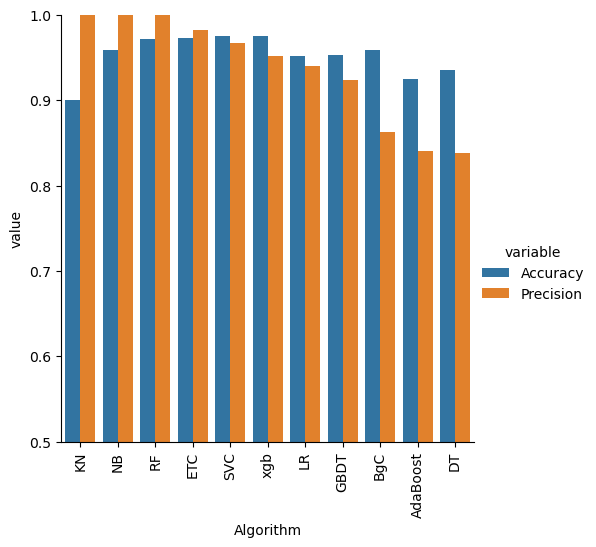

In [67]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# model improve
# 1. Change the max_features parameter of TfIdf

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=1000)

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [70]:
y = df['target'].values


In [71]:
from sklearn.model_selection import train_test_split


In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = LinearSVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [78]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9796905222437138
Precision -  0.968
For  KN
Accuracy -  0.9177949709864603
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8653846153846154
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9626168224299065
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9426229508196722
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.965183752417795
Precision -  0.8923076923076924
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9603174603174603
For  GBDT
Accuracy -  0.9555125725338491
Precision -  0.9423076923076923
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9586776859504132


In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [80]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.917795,1.000000
1,NB,0.959381,1.000000,0.976789,0.991379
2,RF,0.971954,1.000000,0.970986,0.942623
3,ETC,0.972921,0.982456,0.978723,0.960317
4,SVC,0.974855,0.966667,0.979691,0.968000
5,xgb,0.974855,0.951613,0.973888,0.958678
6,LR,0.951644,0.940000,0.962282,0.962617
7,GBDT,0.952611,0.923810,0.955513,0.942308
8,BgC,0.958414,0.862595,0.965184,0.892308
9,AdaBoost,0.924565,0.840909,0.924565,0.848837


In [83]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9615384615384616


In [84]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))